In [84]:
import numpy as np
from imutils import paths
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from PIL import Image

In [85]:
import os
path = os.getcwd()
dataset_path = os.path.join(path, 'dataset')

In [86]:
dataset_path = os.path.join(path, 'dataset')
imagePaths = paths.list_images(dataset_path)
data = []
labels = []

In [87]:
for imagepath in imagePaths:
  image = Image.open(imagepath).convert('RGB')
  image = np.array(image.resize((224, 224))) / 255.0
  data.append(image)

  label = imagepath.split(os.path.sep)[-2]
  labels.append(label)

In [88]:
labels_train_unique = np.unique(np.array(labels))

In [89]:
food = {}

for i in range(len(labels_train_unique)):
  food[labels_train_unique[i]] = i
food

{'Gulai_ayam': 0,
 'Kerak_telor': 1,
 'Soto_Ayam': 2,
 'bika_ambon': 3,
 'gudeg': 4,
 'klepon': 5,
 'martabak': 6,
 'nasi_tumpeng': 7,
 'pecel': 8,
 'pempek': 9,
 'rawon': 10,
 'rendang': 11,
 'sate': 12,
 'serabi': 13,
 'tahu_gejrot': 14}

In [90]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(labels[0:3])

[[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]]


In [91]:
(X_train, X_test, Y_train, Y_test) = train_test_split(np.array(data), np.array(labels), test_size=0.3, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1876, 224, 224, 3)
(805, 224, 224, 3)
(1876, 15)
(805, 15)


In [92]:
import tensorflow_hub as hub
import matplotlib.pylab as plt

In [93]:
#mobilenet = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4'
mobilenet = os.path.join(path, "tf2-preview_mobilenet_v2_classification_4")

In [94]:
mobilenet_layers = hub.KerasLayer(mobilenet, input_shape=(224,224,3))

In [95]:
mobilenet_layers.trainable = False

In [96]:
model=tf.keras.models.Sequential([
    mobilenet_layers,
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax')
])

In [97]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              3540265   
                                                                 
 dropout_6 (Dropout)         (None, 1001)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               128256    
                                                                 
 dense_11 (Dense)            (None, 15)                1935      
                                                                 
Total params: 3,670,456
Trainable params: 130,191
Non-trainable params: 3,540,265
_________________________________________________________________


In [98]:
from tensorflow.keras.optimizers import Adam
optimizers=Adam(learning_rate=0.0001)
model.compile(optimizer = optimizers,
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [99]:
history= model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20)

Epoch 1/20
59/59 [==============================] - 12s 93ms/step - loss: 3.6644 - accuracy: 0.1023 - val_loss: 2.2714 - val_accuracy: 0.2832
Epoch 2/20
59/59 [==============================] - 4s 71ms/step - loss: 2.4891 - accuracy: 0.2585 - val_loss: 1.6905 - val_accuracy: 0.4783
Epoch 3/20
59/59 [==============================] - 4s 69ms/step - loss: 1.9491 - accuracy: 0.4003 - val_loss: 1.3419 - val_accuracy: 0.5851
Epoch 4/20
59/59 [==============================] - 4s 65ms/step - loss: 1.5571 - accuracy: 0.4899 - val_loss: 1.1078 - val_accuracy: 0.6658
Epoch 5/20
59/59 [==============================] - 4s 66ms/step - loss: 1.3189 - accuracy: 0.5906 - val_loss: 0.9607 - val_accuracy: 0.7068
Epoch 6/20
59/59 [==============================] - 4s 65ms/step - loss: 1.1733 - accuracy: 0.6274 - val_loss: 0.8558 - val_accuracy: 0.7304
Epoch 7/20
59/59 [==============================] - 4s 65ms/step - loss: 0.9821 - accuracy: 0.6903 - val_loss: 0.7714 - val_accuracy: 0.7640
Epoch 8/20
5

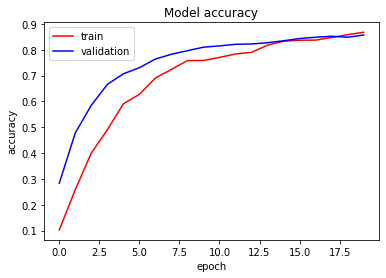

In [100]:
plt.plot(history.history['accuracy'], label='train', color="red")
plt.plot(history.history['val_accuracy'], label='validation', color="blue")
plt.title('Model accuracy')
plt.legend(loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.savefig('model2.png')
plt.show()

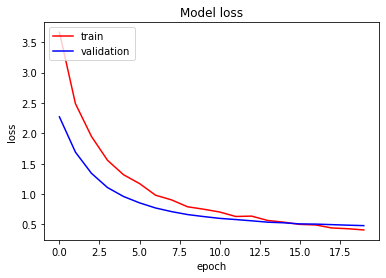

In [101]:
plt.plot(history.history['loss'], label='train', color="red")
plt.plot(history.history['val_loss'], label='validation', color="blue")
plt.title('Model loss')
plt.legend(loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
#plt.savefig('model.png')
plt.show()

In [102]:
score = model.evaluate(X_test, Y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.4807710349559784
Test accuracy: 0.8571428656578064


In [103]:
model.save('model3.h5')

# TESTING IMAGE

In [5]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input
from imutils import paths
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np


In [10]:
#LOAD MODEL
model = os.path.join('model3.h5')
model = tf.keras.models.load_model(model, custom_objects={'KerasLayer':hub.KerasLayer})

In [11]:
path = os.getcwd()
labels = []
dataset_path = os.path.join(path, 'dataset')
dataset_path = os.path.join(path, 'dataset')
imagePaths = paths.list_images(dataset_path)

for imagepath in imagePaths:
  label = imagepath.split(os.path.sep)[-2]
  labels.append(label)

labels_train_unique = np.unique(np.array(labels))

food = {}

for i in range(len(labels_train_unique)):
  food[labels_train_unique[i]] = i
food

{'Gulai_ayam': 0,
 'Kerak_telor': 1,
 'Soto_Ayam': 2,
 'bika_ambon': 3,
 'gudeg': 4,
 'klepon': 5,
 'martabak': 6,
 'nasi_tumpeng': 7,
 'pecel': 8,
 'pempek': 9,
 'rawon': 10,
 'rendang': 11,
 'sate': 12,
 'serabi': 13,
 'tahu_gejrot': 14}

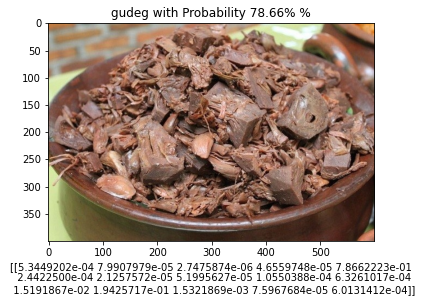

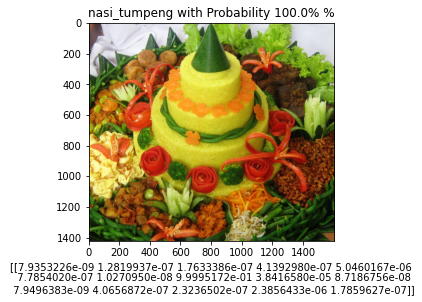

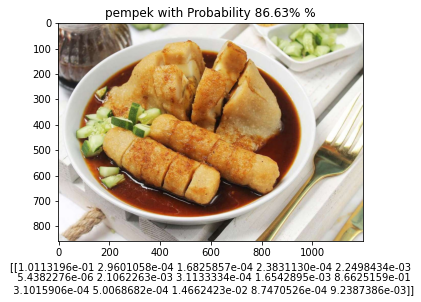

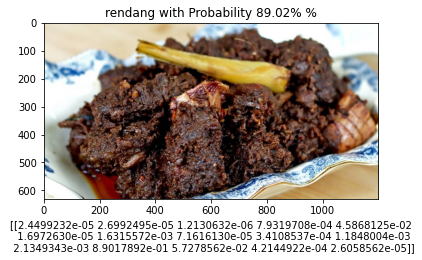

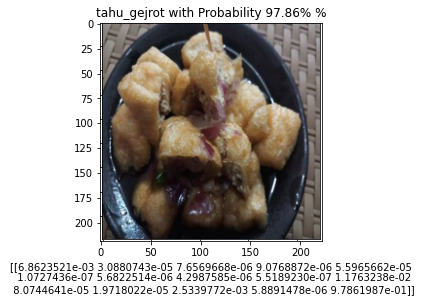

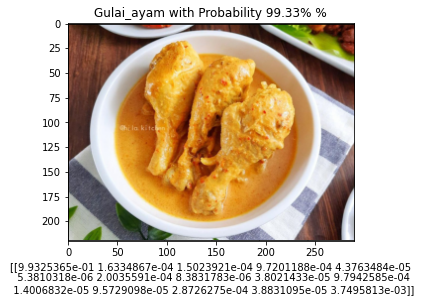

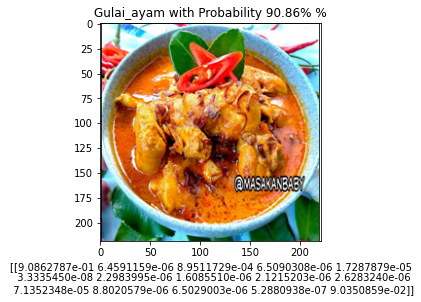

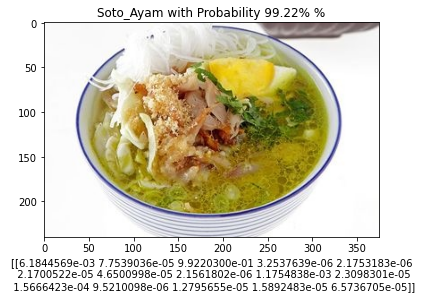

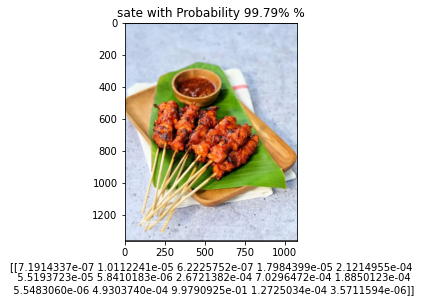

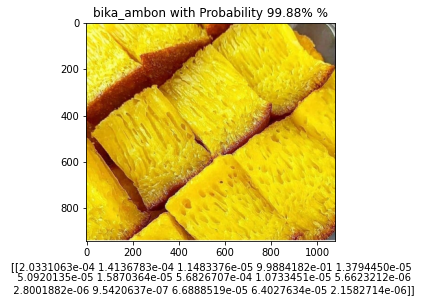

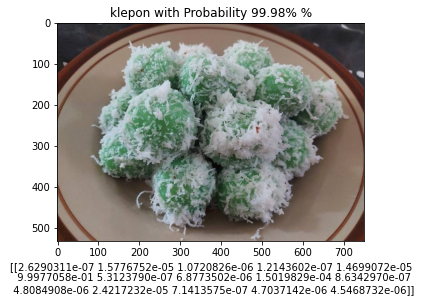

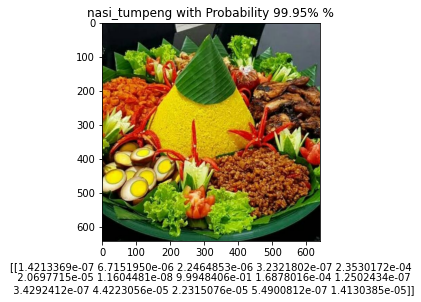

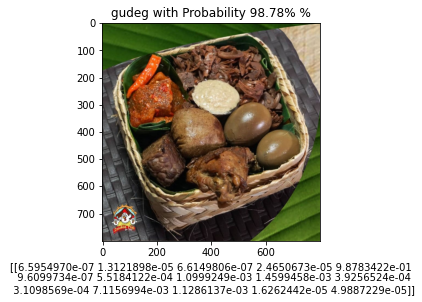

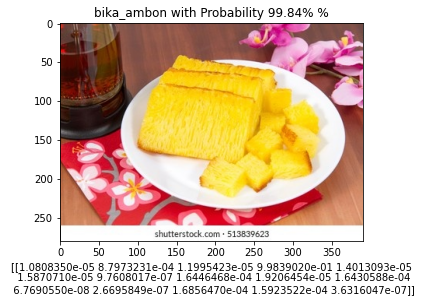

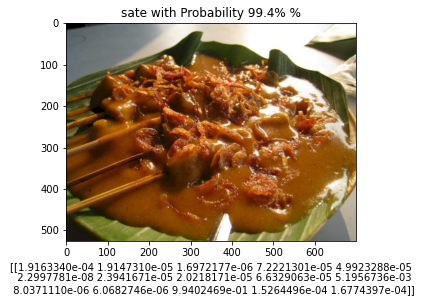

In [12]:
image_path = os.path.join(os.getcwd(), 'test_image')



for a in os.listdir (image_path):
    images = os.path.join(image_path, a)
    images = image.load_img(images, target_size=(224, 224))
    img = image.img_to_array(images)
    img = np.expand_dims(img, axis=0)
    processed_image = np.array(img, dtype='float') / 225.0
    pred = model.predict(processed_image)
 

    i = 0
    i_max=0
    max_val = ""

    for (k, result) in enumerate(food.keys()):

        if (pred[i][k] > i_max):
            i_max = pred[i][k]
            max_val = result

        txt = str(max_val) + " with Probability "+ str("{:.4}%".format(i_max*100)) + " %"

    gambar = mpimg.imread(os.path.join(image_path, a))
    plt.figure()
    plt.imshow(gambar)
    plt.title(txt)
    plt.xlabel(pred)